In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
main_df = pd.read_csv('../data/World Energy Consumption.csv')
countries = ['New Zealand']
filtered_df = main_df[main_df['country'].isin(countries)]

In [25]:
renewable_columns = [
    'solar_share_energy', 'wind_share_energy', 'hydro_share_energy',
    'biofuel_share_energy', 'other_renewables_share_energy'
]
columns_needed = ['country', 'year'] + renewable_columns
data_selected = filtered_df[columns_needed].dropna()

In [26]:
def renewable_share_nz_insights():
    latest_year = data_selected['year'].max()
    earliest_year = data_selected['year'].min()

    latest_data = data_selected[data_selected['year'] == latest_year]
    earliest_data = data_selected[data_selected['year'] == earliest_year]

    print(f"\n Renewable Energy Share in New Zealand from {earliest_year} to {latest_year}\n")

    for col in renewable_columns:
        source = col.replace('_share_energy', '').capitalize()
        start = earliest_data[col].values[0]
        end = latest_data[col].values[0]
        change = end - start
        direction = "increased" if change > 0 else "decreased"
        print(f"🔹 {source} share {direction} from {start:.2f}% to {end:.2f}% ({change:+.2f}%)")

    # Plotting
    plt.figure(figsize=(12,6))
    for col in renewable_columns:
        plt.plot(data_selected['year'], data_selected[col], label=col.replace('_share_energy', '').capitalize())

    plt.title('Renewable Energy Share by Source in New Zealand (Over Years)')
    plt.xlabel('Year')
    plt.ylabel('Share (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



 Renewable Energy Share in New Zealand from 1990 to 2022

🔹 Solar share increased from 0.00% to 0.31% (+0.31%)
🔹 Wind share increased from 0.00% to 3.21% (+3.21%)
🔹 Hydro share decreased from 36.77% to 29.39% (-7.39%)
🔹 Biofuel share increased from 0.00% to 0.03% (+0.03%)
🔹 Other_renewables share increased from 4.65% to 10.14% (+5.49%)


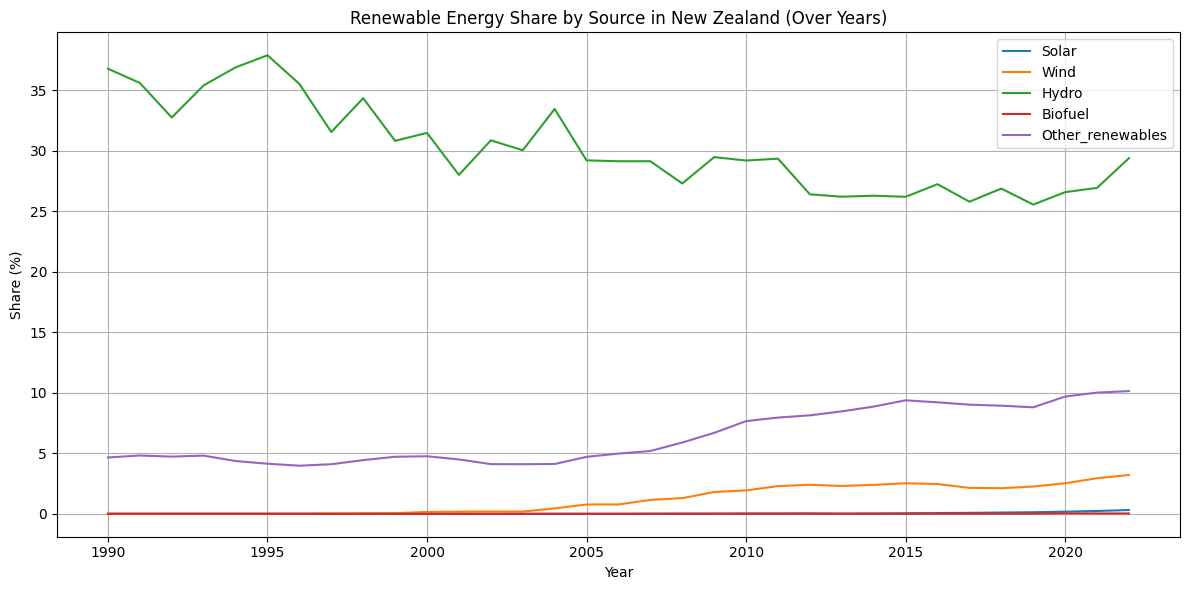

In [27]:
renewable_share_nz_insights()